# PublicDatasets (Analyser)

## 1. Re-reading

In [18]:
special_separator = '___'

In [28]:
import pandas as pd
import seaborn as sns 

In [20]:
mentions_table = pd.read_csv('data/DatasetMentions_sample.csv',index_col=0, sep=';')

In [21]:
mentions_table.head()

,Venue,Title,Dataset Identifier,Citation,Link,Link Access,Bibliography,Publication Access,Origin,Access Notes
1,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,AO & LL,Excluded,NaN,Private,NaN,NaN,NaN,"For the 1st case, we use our private datasets ..."
2,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,RSNA Pneumonia Detection Challenge,Footnote,https://www.kaggle.com/c/rsna-pneumonia-detection,Broken Link,NaN,NaN,kaggle.com,The link is misformatted: https://www.kaggle.c...
3,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,CheXpert,Publication,NaN,NaN,"Jeremy Irvin, Pranav Rajpurkar, Michael Ko, Yi...",Open,stanfordmlgroup.github.io,Available at https://stanfordmlgroup.github.io...
4,MIDL 2021,Embedding-based Instance Segmentation in Micro...,BBBC010 C. elegans,Publication,NaN,NaN,"Vebjorn Ljosa, Katherine L Sokolnicki, and Ann...",Open,bbbc.broadinstitute.org,“We used the C. elegans infection live/dead im...
5,MIDL 2021,Embedding-based Instance Segmentation in Micro...,Usiigaci NIH/3T3 \n,Publication,NaN,NaN,"Hsieh-Fu Tsai, Joanna Gajda, Tyler F.W. Sloan,...",Open,bbbc.broadinstitute.org,Dataset was renamed between preprint and publi...


In [43]:
mentions_table['Origin']

1                           NaN
2                    kaggle.com
3     stanfordmlgroup.github.io
4       bbbc.broadinstitute.org
5       bbbc.broadinstitute.org
6                    kaggle.com
7                    GitHub.com
8                    GitHub.com
9                    GitHub.com
10                   GitHub.com
11                   kaggle.com
12                   kaggle.com
13                   kaggle.com
14            nihcc.app.box.com
15                          NaN
16                          NaN
17                          NaN
18                          NaN
Name: Origin, dtype: object

In [26]:
color_palette=[
    "#F5793A", "#A95AA1", "#85C0F9", "#0F2080"
]

In [116]:
sns.set(rc={"figure.figsize":(8, 3)})

## 2. Venue vs. Citation Style

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Count', ylabel='Venue'>

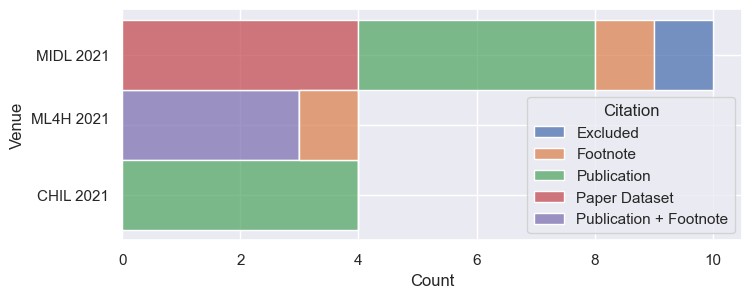

In [117]:
sns.histplot(data=mentions_table, y="Venue", hue="Citation", multiple="stack")

<AxesSubplot:xlabel='Count', ylabel='Citation'>

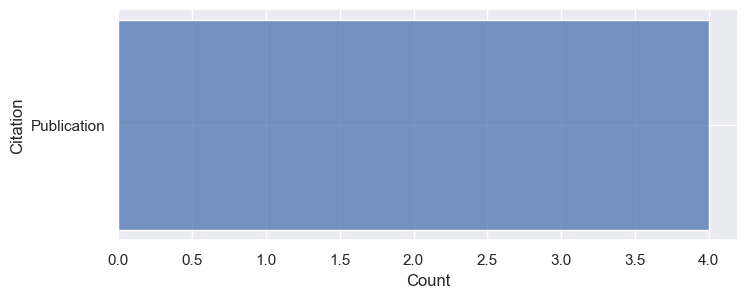

In [118]:
selection_table = mentions_table[mentions_table['Venue']=='CHIL 2021']
sns.histplot(data=selection_table, y="Citation", multiple="stack")

## 3. Origin vs. Citation Style

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Count', ylabel='Origin'>

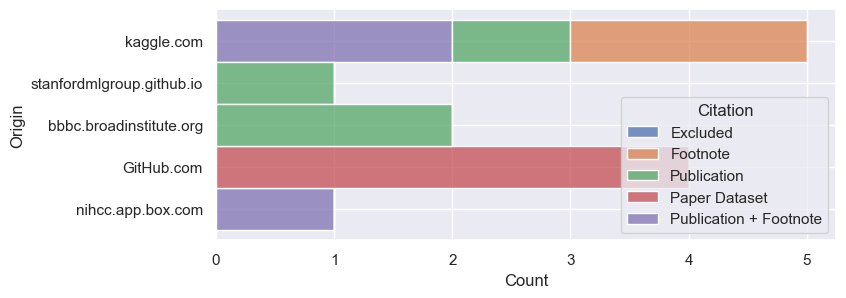

In [119]:
sns.histplot(data=mentions_table, y="Origin", hue="Citation", multiple="stack")

## 4. Broken Links

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Count', ylabel='Origin'>

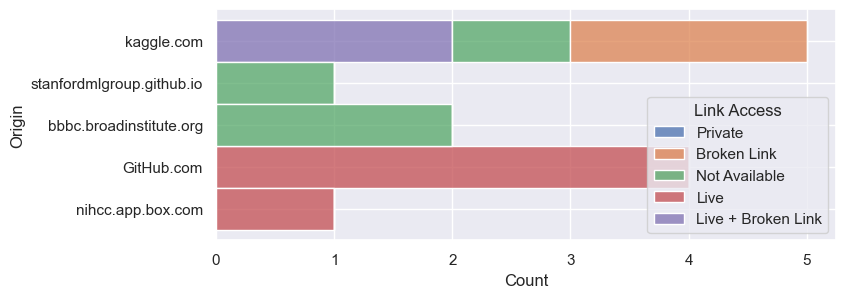

In [120]:
selection_table = mentions_table.copy()
selection_table['Link Access'] = selection_table['Link Access'].fillna('Not Available')
sns.histplot(data=selection_table, y="Origin", hue="Link Access", multiple="stack")

In [113]:
# mentions_table['Link Access']

## 5. Challenge vs. Non-Challenge Datasets

In [121]:
selection_table = mentions_table.copy()
contests = (selection_table['Origin']=='kaggle.com')
selection_table['Contest Mention'] = contests
bibs = (-selection_table['Bibliography'].isnull()) 
selection_table['In Bibliography'] = bibs

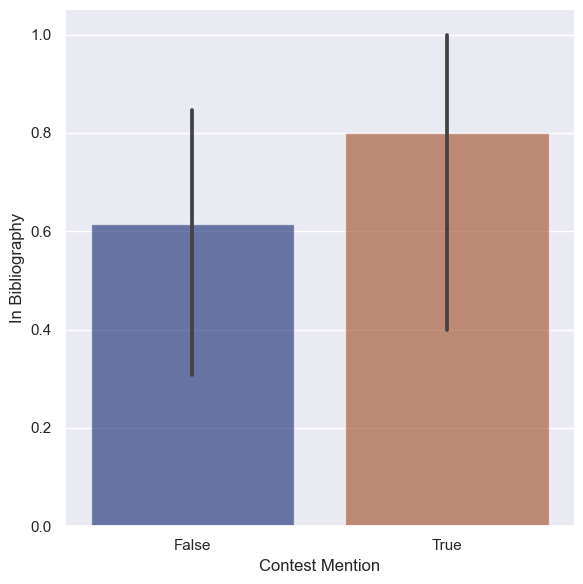

In [122]:
sns.catplot(
    data=selection_table, kind="bar",
    x="Contest Mention", y="In Bibliography", #hue="sex",
    #errorbar="sd",
    palette="dark", alpha=.6, height=6
)

In [123]:
selection_table.head()

,Venue,Title,Dataset Identifier,Citation,Link,Link Access,Bibliography,Publication Access,Origin,Access Notes,Contest Mention,In Bibliography
1,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,AO & LL,Excluded,NaN,Private,NaN,NaN,NaN,"For the 1st case, we use our private datasets ...",False,False
2,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,RSNA Pneumonia Detection Challenge,Footnote,https://www.kaggle.com/c/rsna-pneumonia-detection,Broken Link,NaN,NaN,kaggle.com,The link is misformatted: https://www.kaggle.c...,True,False
3,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,CheXpert,Publication,NaN,NaN,"Jeremy Irvin, Pranav Rajpurkar, Michael Ko, Yi...",Open,stanfordmlgroup.github.io,Available at https://stanfordmlgroup.github.io...,False,True
4,MIDL 2021,Embedding-based Instance Segmentation in Micro...,BBBC010 C. elegans,Publication,NaN,NaN,"Vebjorn Ljosa, Katherine L Sokolnicki, and Ann...",Open,bbbc.broadinstitute.org,“We used the C. elegans infection live/dead im...,False,True
5,MIDL 2021,Embedding-based Instance Segmentation in Micro...,Usiigaci NIH/3T3 \n,Publication,NaN,NaN,"Hsieh-Fu Tsai, Joanna Gajda, Tyler F.W. Sloan,...",Open,bbbc.broadinstitute.org,Dataset was renamed between preprint and publi...,False,True
